(286, 192)
(70, 192)
(286, 192)


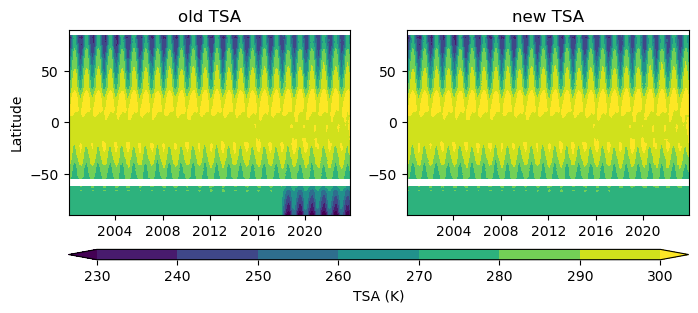

In [36]:
# located: /glade/work/sglanvil/CCR/SMYLE/plot_TSA_SMYLE_LAND.ipynb
# located: /glade/u/home/sglanvil/analysis/python/analysis/lot_TSA_SMYLE_LAND.ipynb
# May 1, 2024

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2000-01-01'
end_date = '2023-10-31'
date_frequency = 'M'
dateArray = pd.date_range(start=start_date, end=end_date, freq=date_frequency)

file = "/glade/derecho/scratch/sglanvil/holdingCell/SMYLE_LAND/smyle_Transient.clm2.h0.200001-202310.nc"
ds = xr.open_dataset(file)
var = ds['TSA']
lon = ds['lon']
lat = ds['lat']
varZM1 = var.mean(dim='lon', skipna=True)

file = "/glade/derecho/scratch/sglanvil/archive/smyle_Transient_201801_newDomain/lnd/hist/TSA_smyle_Transient_201801_newDomain.clm2.h0.201801-202310.nc"
ds = xr.open_dataset(file)
var = ds['TSA']
varZM2 = var.mean(dim='lon', skipna=True)

print(varZM1.shape)
print(varZM2.shape)
varZM3 = xr.concat([varZM1[:216,:], varZM2], dim='time')
print(varZM3.shape)

# ------------- plot old mask and new  mask -------------
contour_levels = np.arange(230, 310, 10)

fig, axs = plt.subplots(1, 2, figsize=(8, 3)) 
im0 = axs[0].contourf(dateArray, lat, varZM1.T, contour_levels, cmap='viridis', extend='both')
axs[0].set_ylabel('Latitude')
axs[0].set_title('old TSA')

im1 = axs[1].contourf(dateArray, lat, varZM3.T, contour_levels, cmap='viridis', extend='both')
axs[1].set_title('new TSA')

cbar = fig.colorbar(im1, ax=axs, orientation='horizontal',pad=0.15, fraction=0.05, aspect=60)
cbar.set_label('TSA (K)')

plt.savefig("/glade/work/sglanvil/CCR/SMYLE/TSA_SMYLE_LAND_01may2024.png", dpi=300)
plt.savefig("/glade/u/home/sglanvil/analysis/python/analysis/TSA_SMYLE_LAND_01may2024.png", dpi=300)


(286, 192, 288)


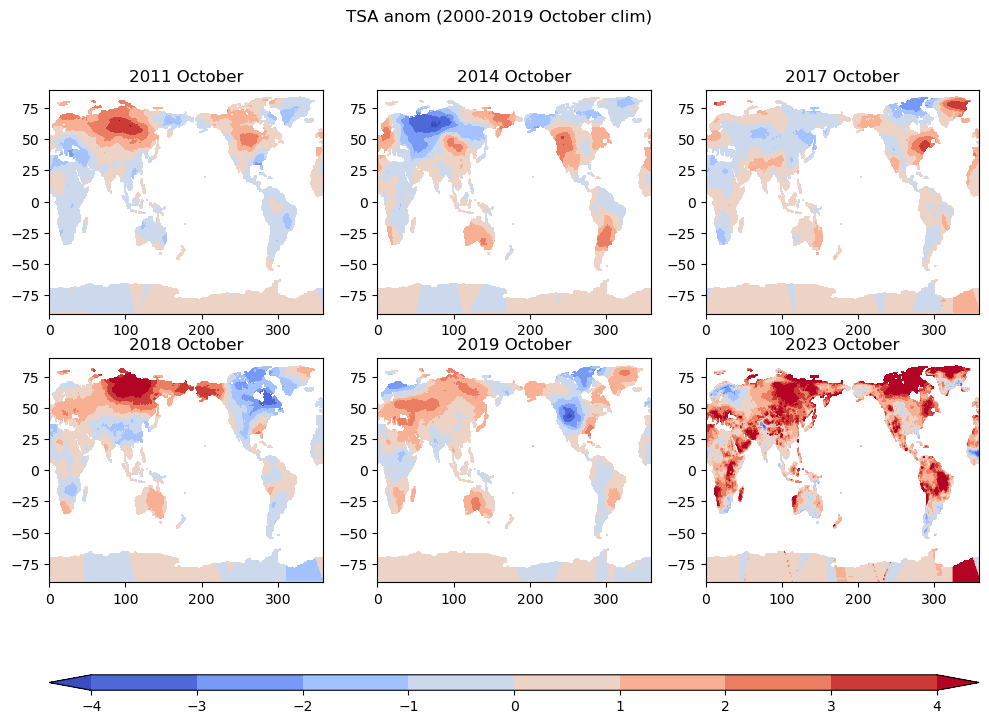

In [222]:
# May 6, 2024
# located: /glade/u/home/sglanvil/analysis/python/analysis/lot_TSA_SMYLE_LAND.ipynb
# plot October anomalies for Yeager

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2000-01-01'
end_date = '2023-10-31'
date_frequency = 'M'
dateArray = pd.date_range(start=start_date, end=end_date, freq=date_frequency)

file = "/glade/derecho/scratch/sglanvil/holdingCell/SMYLE_LAND/TSA_smyle_Transient.clm2.h0.200001-201912.nc"
ds = xr.open_dataset(file)
lon = ds['lon']
lat = ds['lat']
var = ds['TSA']
file = "/glade/derecho/scratch/sglanvil/archive/smyle_Transient_201801_newDomain/lnd/hist/TSA_smyle_Transient_201801_newDomain.clm2.h0.201801-202310.nc"
ds = xr.open_dataset(file)
var2 = ds['TSA']
var3 = xr.concat([var[:,:,:], var2[24:,:,:]], dim='time')

print(var3.shape)

var2023 = var3[(dateArray == '2023-10-31'), :, :]
var2019 = var3[(dateArray == '2019-10-31'), :, :]
var2018 = var3[(dateArray == '2018-10-31'), :, :]
var2017 = var3[(dateArray == '2017-10-31'), :, :]
var2015 = var3[(dateArray == '2015-10-31'), :, :]
var2014 = var3[(dateArray == '2014-10-31'), :, :]
var2013 = var3[(dateArray == '2013-10-31'), :, :]
var2011 = var3[(dateArray == '2011-10-31'), :, :]

var_OCT = var3[(dateArray.month == 10) & (dateArray.year < 2020), :, :]
var_OCTmean = var_OCT.mean(dim='time')
varDiff2023 = np.squeeze(var2023 - var_OCTmean)
varDiff2019 = np.squeeze(var2019 - var_OCTmean)
varDiff2018 = np.squeeze(var2018 - var_OCTmean)
varDiff2017 = np.squeeze(var2017 - var_OCTmean)
varDiff2015 = np.squeeze(var2015 - var_OCTmean)
varDiff2014 = np.squeeze(var2014 - var_OCTmean)
varDiff2013 = np.squeeze(var2013 - var_OCTmean)
varDiff2011 = np.squeeze(var2011 - var_OCTmean)

# contour_levels = np.arange(248, 310, 10)
contour_levels = np.arange(-4, 5, 1)

years = [2011, 2014, 2017, 2018, 2019, 2023]
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axs.flat):
    blah=np.squeeze(eval(f'varDiff{years[i]}')) # use 'var' or 'varDiff'
    contour = ax.contourf(lon, lat, blah, contour_levels, cmap='coolwarm', extend='both')
    ax.set_title(str(years[i])+' October')
fig.colorbar(contour, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.15, fraction=0.05, aspect=60)
# fig.suptitle('TSA raw')
fig.suptitle('TSA anom (2000-2019 October clim)')

# plt.savefig("/glade/u/home/sglanvil/analysis/python/analysis/TSAraw_SMYLE_LAND_06may2024.png", dpi=300)
plt.savefig("/glade/u/home/sglanvil/analysis/python/analysis/TSAanom_SMYLE_LAND_06may2024.png", dpi=300)
